# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [68]:
### YOUR CODE HERE

result2 = differential_evolution(ackley, bounds, seed=42,  strategy='best1bin', popsize=100, 
                                 mutation=0.001) 
# наиболее эффективные:
# strategy: best1bin, randtobest1bin. 
# при увеличении popsize усложняется процесс вычислений
# при снижении mutation от 2 до 0 кол.итераций и сложжность вычислений снижается.
result2


     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2463
     nit: 11
 success: True
       x: array([0., 0.])

In [129]:
min_nit = []

for i in np.arange(0., 2., 0.0005):

    result = differential_evolution(ackley, bounds, strategy = 'best1bin', popsize = 15, tol = 0.6 , mutation = i, seed=42)

    if (result.x == 0).all():
        min_nit.append(result.nit)
print(f'Минимальное nit:{min(min_nit)}')
# print(min_nit)

Минимальное nit:22


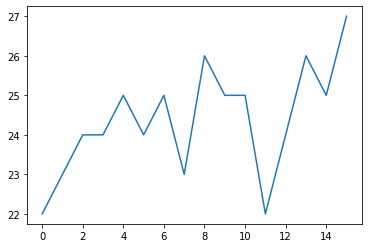

In [130]:
x = min_nit
plt.plot(x)
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [78]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [114]:
### YOUR CODE HERE

result_ = minimize(ackley, x0, method='Nelder-Mead', options={'disp':True}) # Powell, trust-constr, 
# result_

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 17


Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
